### Checking assumptions and including interactions - Exercises & Answers

## 1. Fitting some models and checking our assumptions
Before we begin, lets import most of the things that we'll need.

### a. Imports
Import `pandas`, `pingouin`, `statsmodels.formula.api` and `seaborn`, and also get the `eval_measures` module from `statsmodels` so we can access the RMSE function


In [1]:
# Your answer here
import pandas as pd
import pingouin as pg
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.tools.eval_measures as measures

sns.set_style('whitegrid')

### b. Loading up data
This week we test our skills on a new dataset, called the 'Teaching Ratings' dataset. This dataset contains 463 teaching evaluations of a set of professors at the University of Austin, and the characteristics of their course - and also includes how attractive the professor is perceived to be! 

You can find more discussion of the dataset [here](https://vincentarelbundock.github.io/Rdatasets/doc/AER/TeachingRatings.html), but for our purposes, we will consider the following variables described briefly here:
- `age`, the professors age
- `minority`, whether the professor belongs to a non-Caucasian minority.
- `gender`, indicating the professors gender
- `beauty`, a standardised measure of the attractiveness of the professor.
- `eval`, the course evaluation score that ranges from 1 to 5.
- `native`, whether the instructor is a native English speaker or not.
- `students`, number of students who provided evaluations of this professor.
- `prof`, a simple number indicating the professor.

You can find the dataset at this link:
https://vincentarelbundock.github.io/Rdatasets/csv/AER/TeachingRatings.csv

Read it into a dataframe called `profs` and show the top 5 rows.

In [2]:
# Your answer here
# Read in the dataset
profs = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/AER/TeachingRatings.csv')
profs.head()

,rownames,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof
0,1,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1
1,2,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2
2,3,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3
3,4,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4
4,5,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5


### c. Some graphic exploratory associations
Teaching evaluations are studied in surprising depths, particularly in fields such as economics, marketing, and in some parts of psychology. Two constant findings are that a) females receive lower ratings, on average, and that b) more physically attractive individuals get higher ratings, an example of the 'halo effect'.

We will examine these questions with a linear model that we will refine. We will aim to predict course evaluations from gender and beauty.

First, let us check the assumption of linearity and additivity. Using `seaborn`, make a scatterplot that shows the association between course evaluations and beauty, first colouring each point by whether it belongs to a male or female, and then making a separate plot for each gender - this might require a quick look at last weeks notes, but repetition will solidify these concepts, and allow you to check your first assumptions.

<Axes: xlabel='beauty', ylabel='eval'>

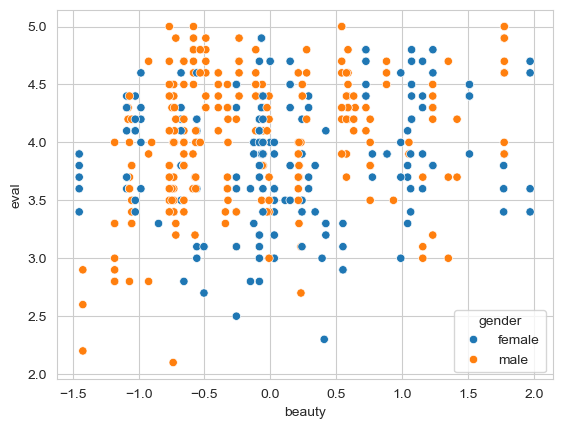

In [3]:
# Scatterplot - your answer here
sns.scatterplot(data=profs, x='beauty', y='eval', hue='gender')

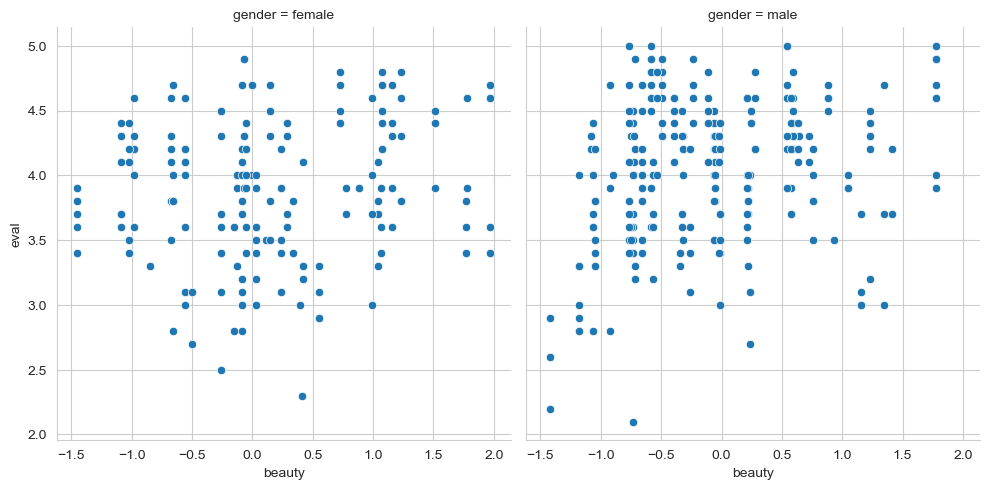

In [4]:
# Separate plots - your answer here
sns.relplot(data=profs, col='gender', x='beauty', y='eval')

Is the assumption of additivity/linearity OK here? Do you observe *relatively linear associations* between these variables?

### d. Fitting a model and interpreting outputs
With that assumption in the bag, fit a model that predicts evaluations from beauty and gender. Make sure you scale beauty, but not gender, to make the interpretation a bit simpler. Store it in dataframe called `modelA` and inspect the summary.

In [5]:
# Your answer here
# Fit model, show summary
modelA = smf.ols('eval ~ gender + scale(beauty)', data=profs).fit()
modelA.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
No. Observations:                 463   F-statistic:                     16.33
Covariance Type:            nonrobust   Prob (F-statistic):           1.41e-07
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.8838      0.039    100.468      0.000       3.808       3.960
gender[T.male]     0.1978      0.051      3.880      0.000       0.098       0.298
scale(beauty)      0.1171      0.025      4.650      0.000       0.068       0.167
==================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From this, what is the mean difference in evaluations between female and male professors, if beauty is set to zero? The answer is in the coefficients.

In [6]:
# Your answer here
# Females = intercept, males = intercept + coefficient for gender

From a glance at the coefficients, a new professor who is *two* SDs above the mean would have an increase of how much in their teaching ratings?

In [7]:
# Your answer here
# 2 * the coefficient of scaled beauty.

### e. Evaluating the model and checking
We've got some basic answers from our model about the influence of beauty and gender on teaching ratings. We also saw these relationships were relatively linear - so now lets see whether our model is any good. 

Produce a histogram and KDE plot of residuals, checking the normality of the errors. Can you also conduct a Shapiro-Wilk test on them to see if they come from a normal distribution?

ShapiroResult(statistic=0.9804073996638387, pvalue=6.764511194804067e-06)

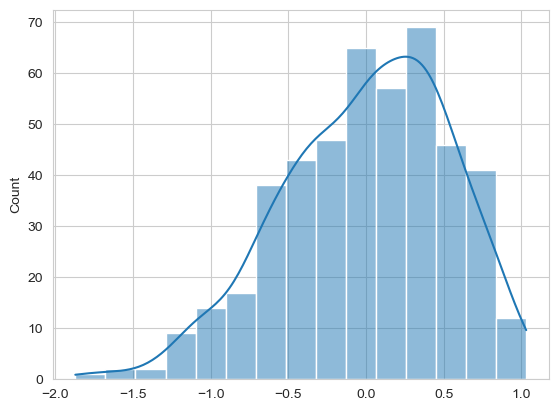

In [8]:
# Your answer here
sns.histplot(modelA.resid, kde=True)

from scipy.stats import shapiro
shapiro(modelA.resid)

How do these look? Is the test significant?

### d. Checking for homoscedasticity
The residuals look mostly normal, though the test is once again suggesting a problem! Move on now to checking the assumption of homoscedasticity - is the variance in prediction consistent? You will need to make a scatterplot of the predictions and the errors here. Can you also add a line at zero to make the points clear?

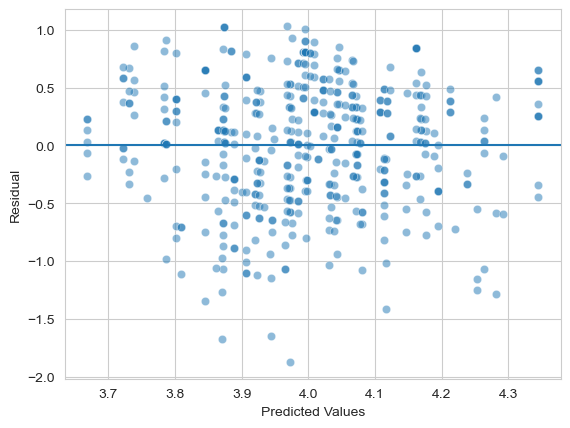

In [9]:
axis = sns.scatterplot(x=modelA.fittedvalues, 
                       y=modelA.resid, alpha=.5) # scatter is easy
axis.set(xlabel='Predicted Values', ylabel='Residual') # Renaming 
axis.axhline(0) # Adding a horizontal line at zero

How does this look? Any issues here?

### f. Further assumptions and conceptual issues
Have a look at the `prof` column of your `profs` dataset. This column tells you which rows of the dataset (courses, ratings, etc) belong to a single professor. For example, professor 34 has 13 rows associated with them, as they were evaluated 13 times across different courses. You can count the number of unique values in this column by using something called `value_counts()`, like so:

`profs['prof'].value_counts()`

Run this line of code. What does this tell you about the *assumption of independence of errors*?

In [10]:
# Your code here
# How many rows belong to individual professors
profs['prof'].value_counts()

prof
34    13
50    13
82    11
71    10
58    10
      ..
22     1
47     1
69     1
30     1
62     1
Name: count, Length: 94, dtype: int64

While we've done well so far, we've absolutely failed this assumption! Each row of the dataset is **not** independent, with some rows all concerning the same professor. As such we should not trust these results too much - its OK for learning for now, but this would be a bigger issue - and one we will solve later in the course.

It looks as though beauty has an association with course evaluations. If you check the link
[here](https://vincentarelbundock.github.io/Rdatasets/doc/AER/TeachingRatings.html) for a description of the dataset, how much do you trust the `beauty` variable - what's wrong with it? How does this affect our validity and representativeness assumptions?

In [11]:
# Your answer here
# Its based on just six people! Is that good?

### g. Checking prediction errors
Finally for the assumptions of this model, can you check the prediction error using RMSE? How 'off' on average is this model in terms of course evaluations? Is this good?

In [12]:
# Your answer here
measures.rmse(profs['eval'], modelA.fittedvalues)

0.5355783806218819

## 2. Expanding the model to improve inferences
We can now expand the model to answer a more complex, but more realistic question. The initial model examines whether both males and females differ in their evaluations, *controlling* for attractiveness - remember the coefficient of gender tests the mean difference when other predictors are zero. We also saw that attractiveness is associated with higher course evaluations, altogether.

### a. An interaction
Perhaps we should consider whether the effect of attractiveness on evaluations is *different* for men and women. To do this, we need an interaction. Fit a model with an interaction between gender and (scaled) beauty; call it `modelB`.

In [13]:
# Your answer here
# Interaction model
modelB = smf.ols('eval ~ scale(beauty) + gender + scale(beauty):gender', data=profs).fit()
modelB.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.066
No. Observations:                 463   F-statistic:                     11.97
Covariance Type:            nonrobust   Prob (F-statistic):           1.47e-07
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.8909      0.039    100.337      0.000       3.815       3.967
gender[T.male]                   0.1951      0.051      3.834      0.000       0.095       0.295
scale(beauty)                    0.0690      0.037      1.862      0.063      -0.004       0.142
scale(beauty):gender[T.male]     0.0888      0.050      1.761      0.079      -0.010       0.188
================================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

First, can you conduct an F-test to see whether the interaction significantly raises the $R^2$ compared to `modelA`?

In [14]:
# Your answer here
modelB.compare_f_test(modelA)

(3.1010028248372294, 0.07890991920658393, 1.0)

Can you calculate the RMSE and see whether it has improved as a consequence of including the interaction?

In [15]:
# Your answer here
measures.rmse(profs['eval'], modelB.fittedvalues)

0.5337783133573137

Does this model suggest evidence of beauty influence teaching evaluations? Note the differences between the conclusions of modelA and modelB, and consider which model is more representative of the real process of teaching evalutions.

In [16]:
# Your answer here
# No, no clear evidence in B, but some in A, but A is less realistic.

### b. Additional controls
When building models, it is necessary to think carefully about the process you are studying, and remember the mantra that 'all models are wrong, but some are useful'.

Suppose our initial question is to see how beauty affects teaching evaluations separately for men and women. The interaction certainly allows us to answer that, but the dataset contains many other variables that likely impact teaching evaluations. For example:
- `minority` codes whether the professor belongs to an ethnic minority. There is a long history suggesting things like accents affect teaching evaluations (sadly).
- `age` may affect beauty, since younger people are more attractive, on average.
- `tenure` codes whether a professor has achieved tenure, generally granted after around 7 years of teaching and research experience. In principle, these individuals should be better teachers.

Let us now expand our model to include these predictors. We will scale age since it is a continuous variable, but we will just include minority and tenure. Including these will allow to see if our hypothesised interaction between sex and beauty exists once we account (i.e., set to zero) these other important predictors of teaching ability. Call this `modelC`.

In [17]:
# Your answer here
modelC = smf.ols('eval ~ minority + tenure + scale(age) + gender + scale(beauty) + scale(beauty):gender', 
                 data=profs).fit()
modelC.summary(slim=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.082
No. Observations:                 463   F-statistic:                     7.892
Covariance Type:            nonrobust   Prob (F-statistic):           4.18e-08
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        4.0276      0.060     67.262      0.000       3.910       4.145
minority[T.yes]                 -0.0837      0.074     -1.138      0.256      -0.228       0.061
tenure[T.yes]                   -0.1825      0.062     -2.958      0.003      -0.304      -0.061
gender[T.male]                   0.2197      0.053      4.154      0.000       0.116       0.324
scale(age)                      -0.0364      0.027     -1.331      0.184      -0.090       0.017
scale(beauty)                    0.0842      0.038      2.238      0.026       0.010       0.158
scale(beauty):gender[T.male]     0.0424      0.052      0.813      0.416      -0.060       0.145
================================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now check whether *this* model is 'significantly' better than modelB, and then check the RMSE. What does the statistical significance of the test tell you in comparison to the RMSE?

In [18]:
# Your answer here
print(modelC.compare_f_test(modelB))
print(measures.rmse(profs['eval'], modelC.fittedvalues))

(3.6090171263130095, 0.013388316523354751, 3.0)
0.5275520794476387


What does the model indicate about the effects of beauty now, and the difference between males and females? What about the effects of having tenure and being in a minority?

In [19]:
# Your answer here
# No effect of minority, tenured reduces evaluation, 
# males are still higher then females, 
# beauty weakly increases evaluations, and no difference in that between sexes

### c. A final challenge in interactions
The interaction we have examined so far (with additional controls) is an interaction between two variables, one a categorical variable and one a continuous. This is sometimes known as a 'two-way' interaction. We can expand this further into an interaction between *three* variables, just to show you that the GLM is very flexible.

Perhaps we think that rather than just controlling for how old a professor is, we should let age interact with gender and beauty. That is, we hypothesise that the effect of beauty on evaluations depends on both your gender, and your age. In order to know how your beauty affects your evaluations, we need to know your age and gender.

Fitting an interaction with three variables is slightly more complex as you must include what's called the 'lower level' interactions, of which there are three!
- beauty:gender (as we've targeted)
- beauty:age
- gender:age

and then you can include the interaction between all three - e.g., beauty:age:gender.

Writing that out would be a lot of work. `statsmodels` simplifies things a bit for us here. So far we've specified interactions with ':', but if we want to include all the lower-level ones in a single go, we can just use '*'. So, to make clear, these two things are identical:

`eval ~ gender + beauty + gender:beauty`
and
`eval ~ gender*beauty`

Being able to write out the full formula is a bonus, but it can slow you down, and this version just makes it easier for us. With that in mind, fit a model below that includes minority and tenure as controls, but lets age, gender, and beauty all interact together. Call this `modelD`, and remember to scale age and beauty.


In [20]:
# Your answer here
modelD = smf.ols('eval ~ tenure + minority + scale(age)*scale(beauty)*gender', data=profs).fit()
modelD.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.141
No. Observations:                 463   F-statistic:                     9.427
Covariance Type:            nonrobust   Prob (F-statistic):           3.42e-13
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   3.9615      0.060     66.202      0.000       3.844       4.079
tenure[T.yes]                              -0.1355      0.062     -2.170      0.031      -0.258      -0.013
minority[T.yes]                            -0.1045      0.072     -1.442      0.150      -0.247       0.038
gender[T.male]                              0.2893      0.053      5.499      0.000       0.186       0.393
scale(age)                                 -0.1339      0.045     -3.003      0.003      -0.222      -0.046
scale(age):gender[T.male]                   0.1601      0.055      2.906      0.004       0.052       0.268
scale(beauty)                               0.0358      0.049      0.731      0.465      -0.060       0.132
scale(beauty):gender[T.male]                0.0690      0.062      1.108      0.268      -0.053       0.191
scale(age):scale(beauty)                   -0.0414      0.044     -0.934      0.351      -0.129       0.046
scale(age):scale(beauty):gender[T.male]     0.2052      0.056      3.655      0.000       0.095       0.316
===========================================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What does this model say about effect of beauty on evaluations considering age and gender? Can you compare this model to model C, and also assess its RMSE?

In [21]:
# Your answer here
print(modelD.compare_f_test(modelC))
print(measures.rmse(profs['eval'], modelD.fittedvalues))

(11.416009424414138, 3.1413335349546134e-07, 3.0)
0.5086738302618814


Notice how the F-test suggests a very significant increase in variance explained, while RMSE decreases only a little. 

### d. Interpreting this interaction
You can see that the interaction between all three variables (age, gender, beauty) is statistically significant. But what does it *mean*? You absolutely cannot tell by looking at the coefficients, and this is why in general looking at them is folly. Run the code below to see a plot and see if graphically interpreting the predictions helps.

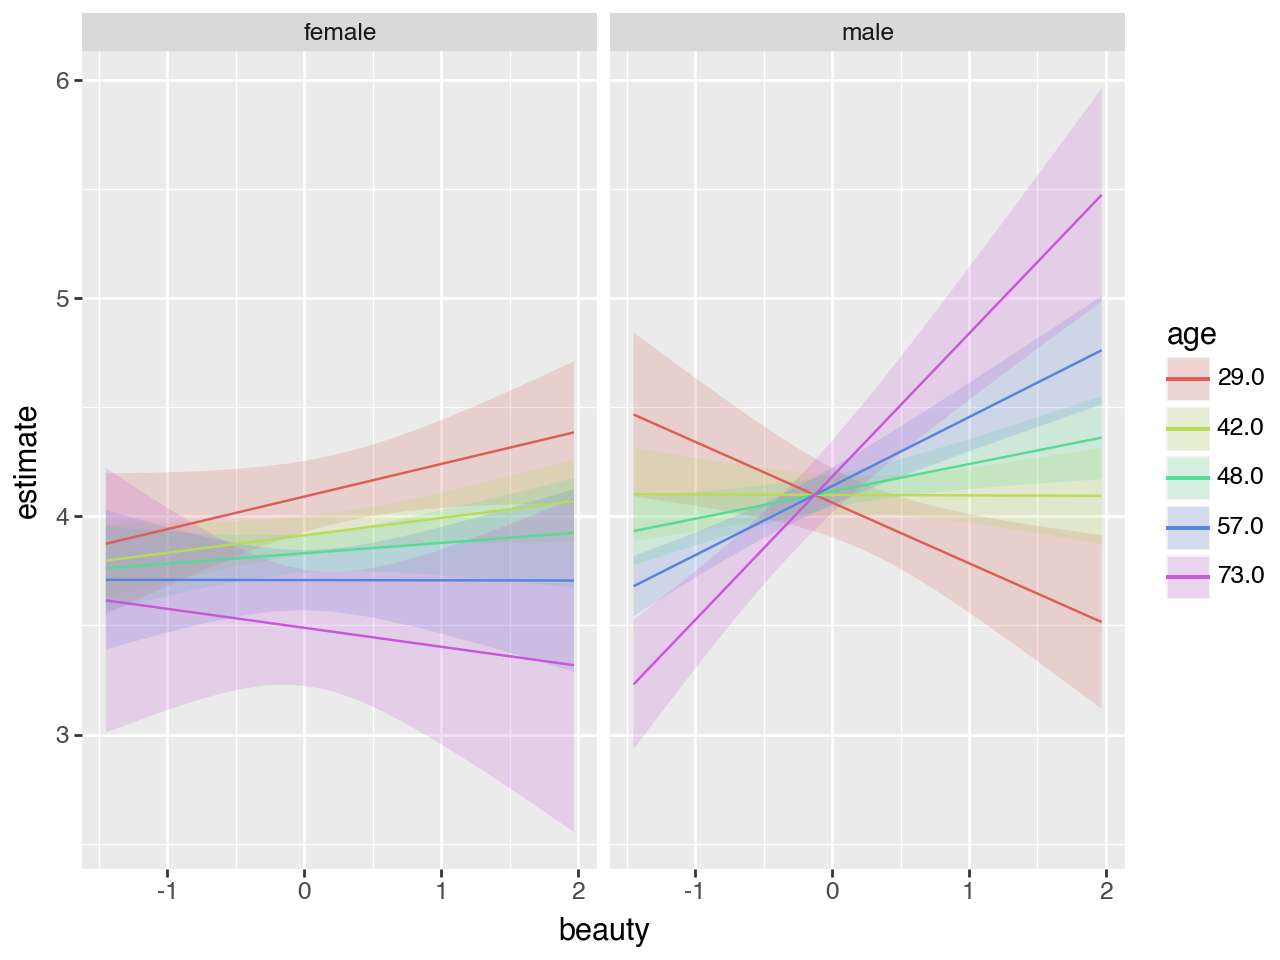

In [22]:
# Try this code for your modelD
import marginaleffects as me
me.plot_predictions(model=modelD, condition=['beauty', 'age', 'gender'])

What does the interaction show you?